# Paired, two-sample t-test playtime
Paired: You are measuring X1[i] and X2[i] on the same test. len(X1) == len(X2). Two samples means you are comparing population X1 to another population X2 (as opposed to Mu2). 

In [46]:
import math
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import matplotlib.pyplot as plt

In [47]:
def compute_t_value(X1, X2):
    # t-value / t-statistic: ratio of departure of an estimated parameter from its notional value
    # e.g. ratio of departure of X1 from X2
    if len(X1) != len(X2):
        print "[ERROR] Can't run if lenghts of X1 and X2 do not match."
        return None
    N = float(len(X1)) # so that we don't round up the division result
    Xdiff = []
    Xdiff_squared = []
    for i in xrange(0, int(N)):
        xd = X1[i] - X2[i]
        Xdiff.append(xd)
        Xdiff_squared.append(xd*xd)
    sum_of_diff = sum(Xdiff)
    sum_of_squared_diff = sum(Xdiff_squared)
    sum_of_diff_squared = sum_of_diff * sum_of_diff
    print "Sum of differences =", sum_of_diff
    print "Sum of squared differences =", sum_of_squared_diff
    print "Sum of differences squared =", sum_of_diff_squared
    t = (sum_of_diff / N) / math.sqrt( (sum_of_squared_diff - sum_of_diff_squared/N)/((N-1)*N) )
    degree_of_freedom = N-1
    return (t, degree_of_freedom) 

In [48]:
# Example from http://www.statisticshowto.com/t-test/
X1 = [3, 3, 3, 12, 15, 16, 17, 19, 23, 24, 32]
X2 = [20, 13, 13, 20, 29, 32, 23, 20, 25, 15, 30]

In [49]:
(t, DoF) = compute_t_value(X1, X2)
print "Go to T-Dstribution table (2 tails) at:"
print "http://www.statisticshowto.com/tables/t-distribution-table-two-tails/"
print "Look for the t-value for:"
print "confidence interval = 0.05"
print "degree of freedom = 10"
print "t-value should be 2.228"
print "(ignore sign when comparing t-values, sign on computed indicates direction.)"
print "if computed t is greated than t from table reject the null hypothesis"
print (t, DoF)

Sum of differences = -73
Sum of squared differences = 1131
Sum of differences squared = 5329
Go to T-Dstribution table (2 tails) at:
http://www.statisticshowto.com/tables/t-distribution-table-two-tails/
Look for the t-value for:
confidence interval = 0.05
degree of freedom = 10
t-value should be 2.228
(ignore sign when comparing t-values, sign on computed indicates direction.)
if computed t is greated than t from table reject the null hypothesis
(-2.737328922288369, 10.0)


In [50]:
# t value is not symmetric!!
(t, DoF) = compute_t_value(X2, X1)
print (t, DoF)

Sum of differences = 73
Sum of squared differences = 1131
Sum of differences squared = 5329
(2.737328922288369, 10.0)


In [51]:
X3 = [4, 2, 3, 12, 15, 16, 17, 19, 23, 24, 32] # Slight change to avoid divide by zero
(t, DoF) = compute_t_value(X1, X3)
print "When X1 is compared against itself t-value is ", t
print "Again, if computed t is < 2.228, we accept the null hypothesis."


Sum of differences = 0
Sum of squared differences = 2
Sum of differences squared = 0
When X1 is compared against itself t-value is  0.0
Again, if computed t is < 2.228, we accept the null hypothesis.


# Lets do some plotting (X1, X2)

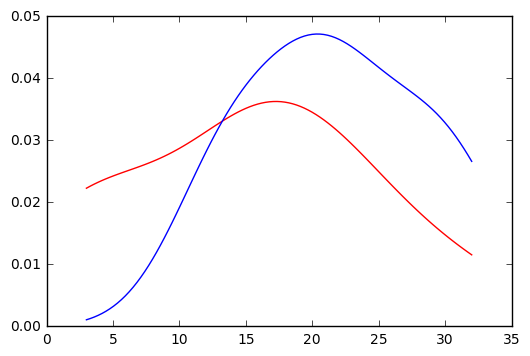

In [52]:
kde_X1 = gaussian_kde(X1)
kde_X2 = gaussian_kde(X2)
# these are the values over wich your kernel will be evaluated
x = linspace( min( min(X1), min(X2)), max( max(X1), max(X2)), 100 )
plt.plot(x, kde_X1(x), 'r')
plt.plot(x, kde_X2(x), 'b')
plt.show()

# Okay, same plotting but (X1, X3)

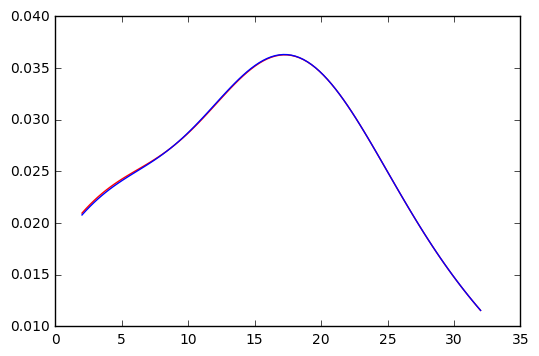

In [54]:
kde_X1 = gaussian_kde(X1)
kde_X3 = gaussian_kde(X3)
# these are the values over wich your kernel will be evaluated
x = linspace( min( min(X1), min(X3)), max( max(X1), max(X3)), 100 )
plt.plot(x, kde_X1(x), 'r')
plt.plot(x, kde_X3(x), 'b')
plt.show()